In [1]:
%matplotlib inline
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_2017_path = '/media/data/charrez/SwissImage/2017_25cm/DOP25_LV95_2659_1146_2017_1.tif'
img_1946_path = '/media/data/charrez/SwissIMAGE/1946/gray_DOP100_LV95_2659_1146_1946.tif'

In [3]:
image_2017 = Image.open(img_2017_path)
image_2017 = np.array(image_2017)
image_1946 = Image.open(img_1946_path)
image_1946 = np.array(image_1946)

## plot 2017

(-0.5, 3999.5, 3999.5, -0.5)

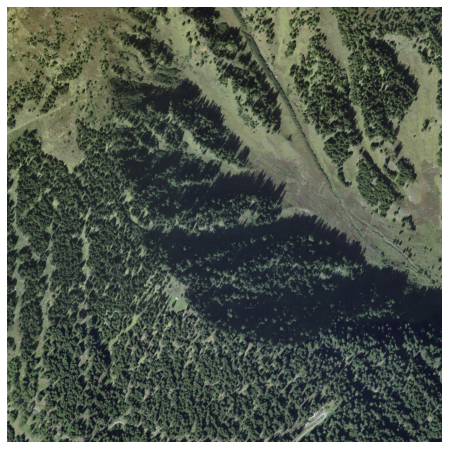

In [22]:

plt.figure(figsize=(8,8))
plt.imshow(image_2017)
plt.axis('off')

## plot 1946

(-0.5, 999.5, 999.5, -0.5)

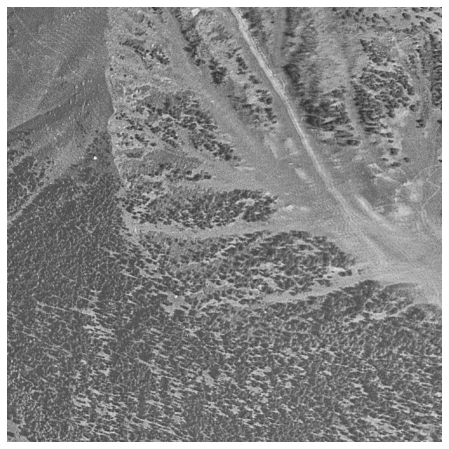

In [21]:

plt.figure(figsize=(8,8))
plt.imshow(image_1946, cmap='gray')
plt.axis('off')

## plot simulated 1946

### Normalised

In [5]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

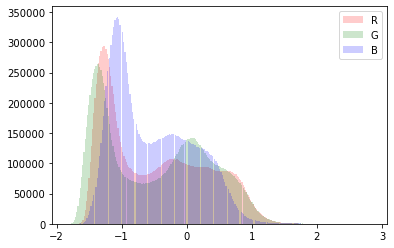

In [4]:
scaled = image_2017
mean = [ 98.01336916, 106.46617234, 93.43728537]
std = [54.22041366, 52.69225063, 46.55903685]
scaled = (scaled - mean) / std

plt.figure()
plt.hist(scaled[:,:,0].ravel(),240, alpha=.2, color='red')
plt.hist(scaled[:,:,1].ravel(),240, alpha=.2, color='green')
plt.hist(scaled[:,:,2].ravel(),240, alpha=.2, color='blue')
plt.legend(['R', 'G', 'B'], loc='best')
plt.show()

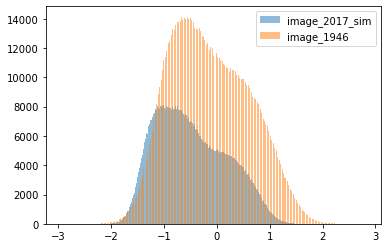

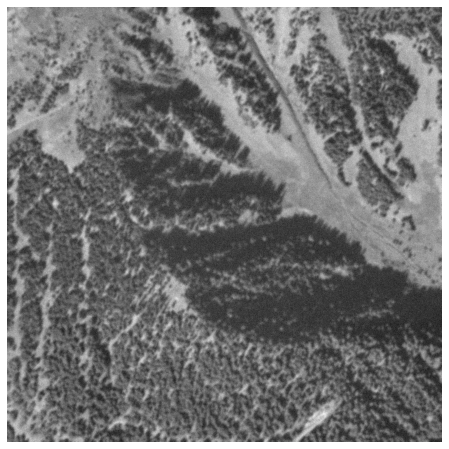

In [29]:
from data.generate_data import *
import cv2

image_2017_sim = image_2017
# image_2017_sim = image_2017_sim.reshape((1,4000,4000, 3))
# image_2017_sim = np.transpose(image_2017_sim, (0, 3, 1, 2))
# image_2017_sim = torch.from_numpy(image_2017_sim)

#################
scaled = image_2017_sim
mean = [ 98.01336916, 106.46617234, 93.43728537]
std = [54.22041366, 52.69225063, 46.55903685]
scaled = torch.from_numpy(((scaled - mean) / std )).movedim((2, 0, 1), (0, 1, 2)).float()
scaled = torch.reshape(scaled, ((1, 3, 4000,4000)))
# batch, ch, x, y = list(scaled.size())
# rgb_scaling=(1,1,1)
# scaled = rgb_scaling[0]*scaled[:,0,:,:] + rgb_scaling[1]*scaled[:,1,:,:] + rgb_scaling[2]*scaled[:,2,:,:]
# scaled /= sum(rgb_scaling)
# scaled = torch.reshape(scaled, (batch,1,x,y))
scaled = nn.functional.interpolate(scaled, size=None, scale_factor=0.5, mode='area', align_corners=None, recompute_scale_factor=None, antialias=False)
scaled = nn.functional.interpolate(scaled, size=None, scale_factor=0.5, mode='area', align_corners=None, recompute_scale_factor=None, antialias=False)
scaled = torchvision.transforms.functional.rgb_to_grayscale(scaled, num_output_channels=1)
# scaled =scaled.type(torch.ByteTensor)
# scaled = torchvision.transforms.functional.posterize(scaled, 3)
# scaled = torchvision.transforms.functional.adjust_brightness(scaled, brightness_factor=2) # 0 balck, 1 original, 2 twice more brightness
# scaled = torchvision.transforms.functional.adjust_gamma(scaled, gamma=1.6, gain=1)
scaled = torchvision.transforms.functional.gaussian_blur(scaled, kernel_size=31, sigma= 2)
# scaled = torchvision.transforms.functional.adjust_contrast(scaled, contrast_factor = 2)
# scaled = torchvision.transforms.functional.adjust_sharpness(scaled, 0)
scaled = AddGaussianNoise(mean=0, std=0.2)(scaled)
image_2017_sim = scaled
####################

# image_2017_sim = generate_simulated_image(image_2017_sim, rgb_scaling=(10,1,1))
image_2017_sim = image_2017_sim.cpu().numpy().reshape((1000,1000,1))
image_1946_norm = (image_1946 - [ 130.75925926]) / [ 35.62340844]

plt.figure()
plt.hist(image_2017_sim.ravel(),300, alpha=.5)
plt.hist(image_1946_norm.ravel(),300, alpha=.5)
plt.legend(['image_2017_sim', 'image_1946'], loc='best')
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(image_2017_sim, cmap='gray')
plt.axis('off')
plt.show()